In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 20, 6
sns.set(font_scale=1.5)

In [3]:
df = pd.read_csv("csv/new_csv/cleaned_data.csv")
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,Gasoline,9.0,236.0,Manual,199.0,EUR,Germany,0.0,NaN,unknown,unknown,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,Gasoline,0.0,0.0,Manual,200.0,EUR,Germany,0.0,NaN,unknown,unknown,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,Gasoline,7.3,171.0,Manual,290.0,EUR,Germany,0.0,NaN,unknown,unknown,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,Gasoline,6.3,151.0,Manual,350.0,EUR,Germany,0.0,NaN,unknown,unknown,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,Gasoline,6.0,152.0,Manual,380.0,EUR,Germany,0.0,NaN,unknown,unknown,380.0


In [4]:
df.dtypes

name                       object
mark                       object
year                        int64
mileage                   float64
engine_power_kW           float64
engine_power_hp           float64
fuel_type                  object
consumption_(l/100 km)    float64
ecology_(gCO2/km)         float64
gearbox                    object
price                     float64
currency                   object
country                    object
engine_size               float64
nr_of_accidents           float64
color_exterior             object
color_interior             object
price_eur                 float64
dtype: object

In [5]:
df.describe()

,year,mileage,engine_power_kW,engine_power_hp,consumption_(l/100 km),ecology_(gCO2/km),price,engine_size,nr_of_accidents,price_eur
count,1700.000000,1700.000000,358.000000,358.000000,309.000000,313.000000,1.700000e+03,1700.000000,573.000000,1.700000e+03
mean,1935.105882,117958.987059,78.849162,107.282123,6.659223,162.047923,3.086723e+04,868.820588,0.205934,1.513227e+04
std,386.021489,99222.841161,27.951131,38.024115,1.613706,38.538870,1.855613e+05,1195.525996,0.494197,4.509808e+04
min,0.000000,0.000000,30.000000,41.000000,0.000000,0.000000,5.500000e+01,0.000000,0.000000,1.237000e+01
25%,2007.000000,44676.000000,55.000000,75.000000,5.700000,137.000000,4.250000e+03,0.000000,0.000000,3.990000e+03
50%,2013.000000,91199.000000,74.000000,101.000000,6.400000,159.000000,1.169050e+04,0.000000,0.000000,9.334605e+03
75%,2018.000000,178764.750000,100.000000,136.000000,7.500000,185.000000,1.975850e+04,1794.000000,0.000000,1.570916e+04
max,2020.000000,700000.000000,176.000000,239.000000,13.200000,284.000000,7.217642e+06,7201.000000,3.000000,1.623255e+06


In [6]:
def randomize_colors(num=5):
    colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink',  'hotpink',
                  'turquoise', 'orange', 'coral', 'orchid']
    return colors_list[:num]

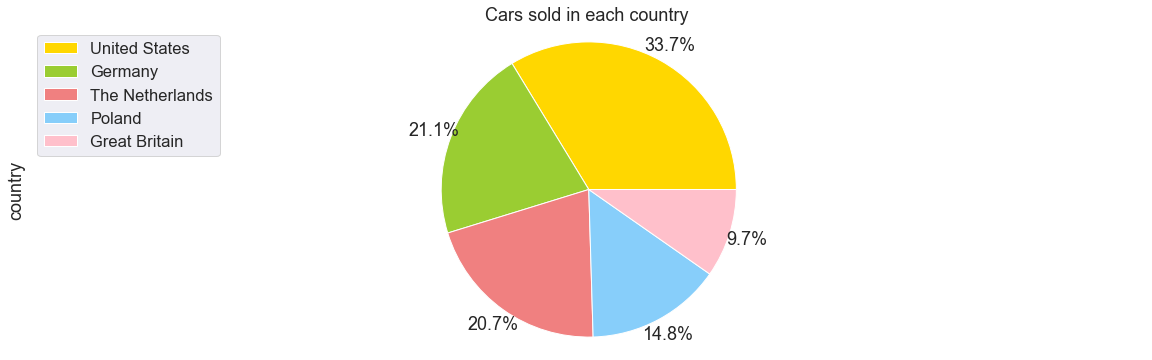

In [7]:
df.country.value_counts().plot(kind="pie",
                              autopct='%1.1f%%',
                              labels=None,
                              pctdistance=1.12,
                              colors=randomize_colors())
plt.axis('equal') 
plt.title('Cars sold in each country')
plt.legend(labels=df.country.value_counts().index, loc='upper left') 
plt.show()

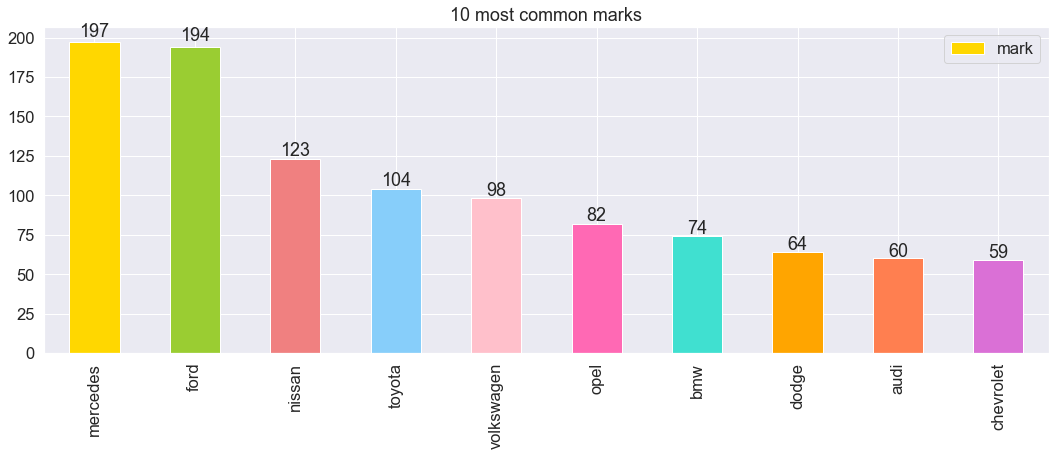

In [8]:
# rcParams["figure.figsize"] = 18, 6
df_m = df.mark.value_counts().to_frame()
df_m = df_m.head(10)
df_bars = df_m.plot(kind="bar", figsize=(18, 6), title="10 most common marks", color=[randomize_colors(10)])
for bar in df_bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy() 
    df_bars.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
# plt.plot(df_m)
# sns.countplot(df_m).set_title("Different marks in the dataset")

In [9]:
df_mean_price = df.groupby(['mark']).mean().round(2)
df_mean_price = df_mean_price["price_eur"].to_frame()
df_mean_sorted = df_mean_price.sort_values(["price_eur"])
df_top_expensive = df_mean_sorted.tail(5)
df_top_cheap = df_mean_sorted.head(5)

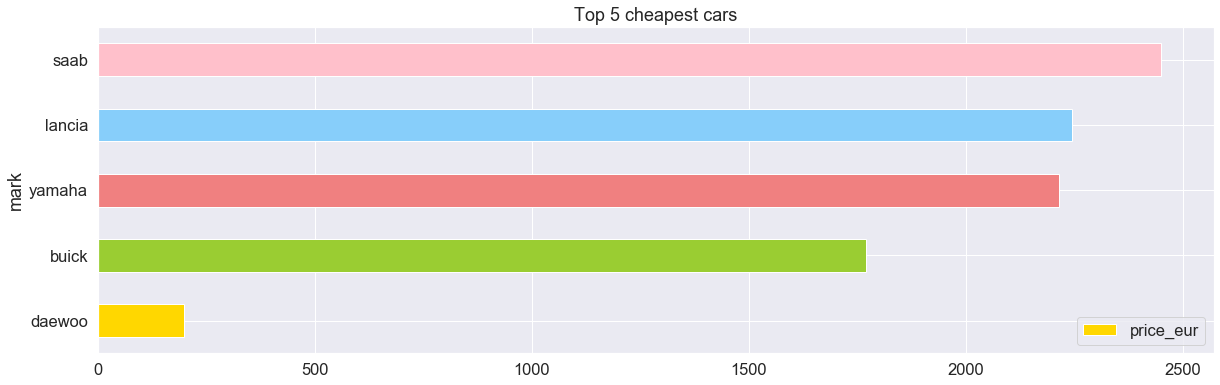

In [10]:
df_top_cheap.plot(kind="barh", title="Top 5 cheapest cars",color=[randomize_colors()])

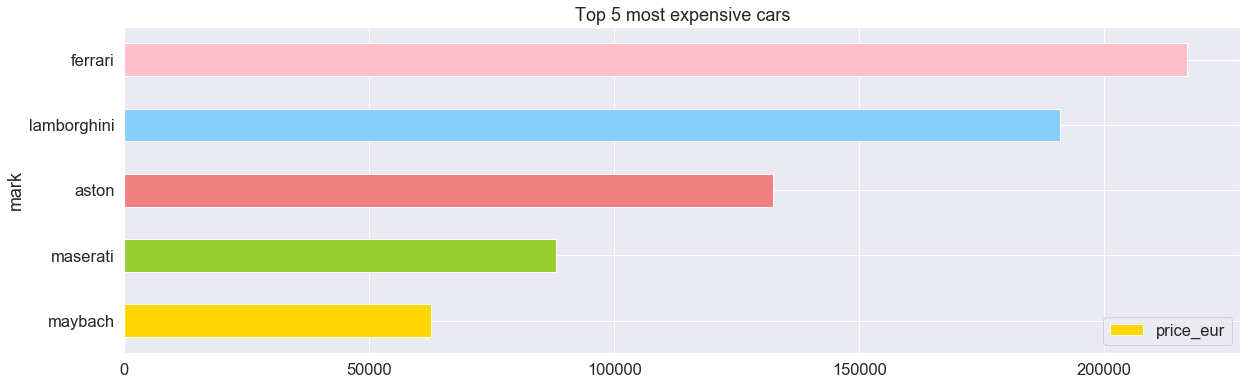

In [11]:
df_top_expensive.plot(kind="barh", title="Top 5 most expensive cars", color=[randomize_colors()])

In [12]:
df = df[~df.mark.isin(['lamborghini', 'ferrari', 'aston'])]

Text(0.5, 1.0, 'Cars by Year')

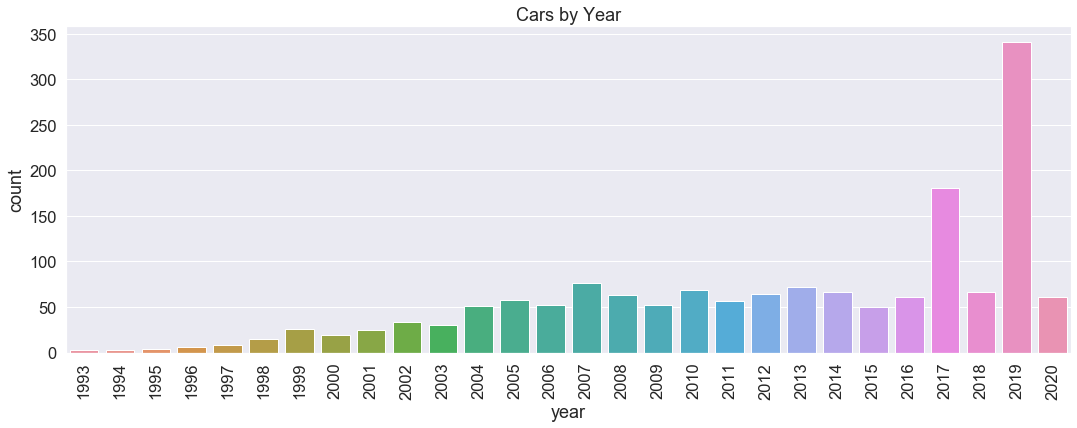

In [13]:
rcParams["figure.figsize"] = 18, 6
df = df[df.year > 1992]
plt.xticks(rotation = 90)
sns.countplot(df.year).set_title("Cars by Year")

Text(0.5, 1.0, 'Cars by Fuel Type')

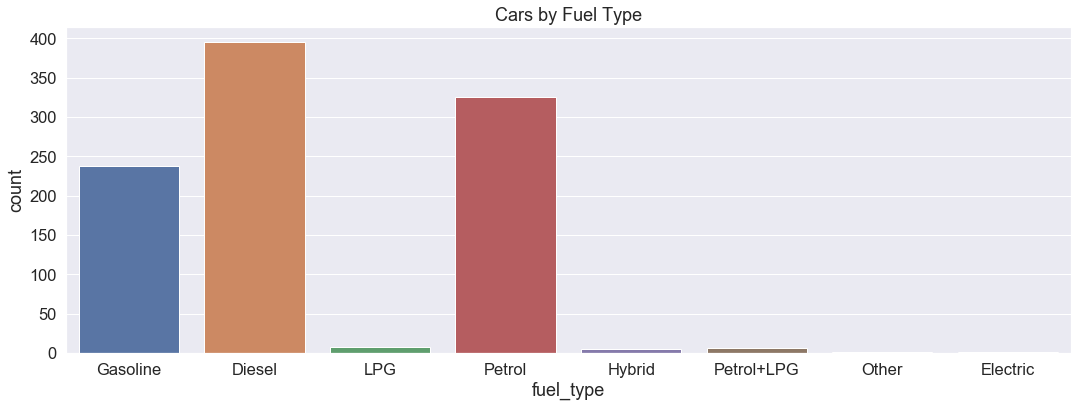

In [14]:
sns.countplot(df[df.fuel_type != "unknown"].fuel_type).set_title("Cars by Fuel Type")

Text(0.5, 1.0, 'Cars by Transmission')

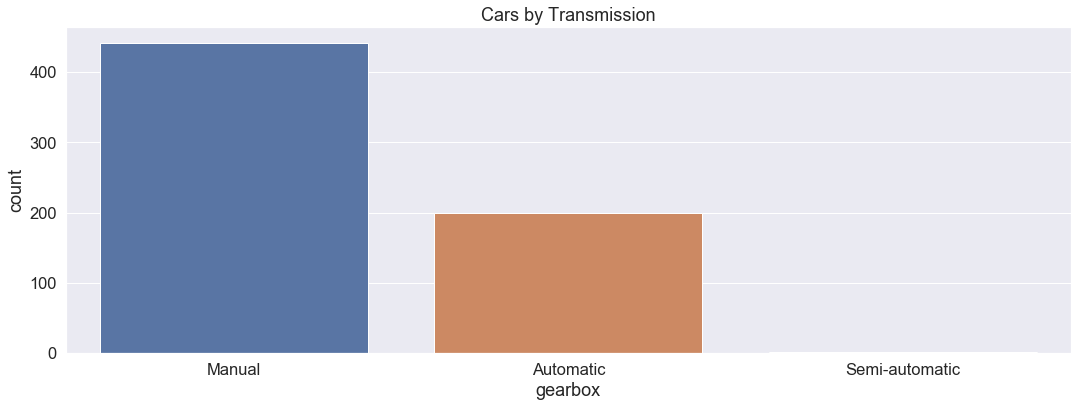

In [15]:
sns.countplot(df[df.gearbox != "unknown"].gearbox).set_title("Cars by Transmission")

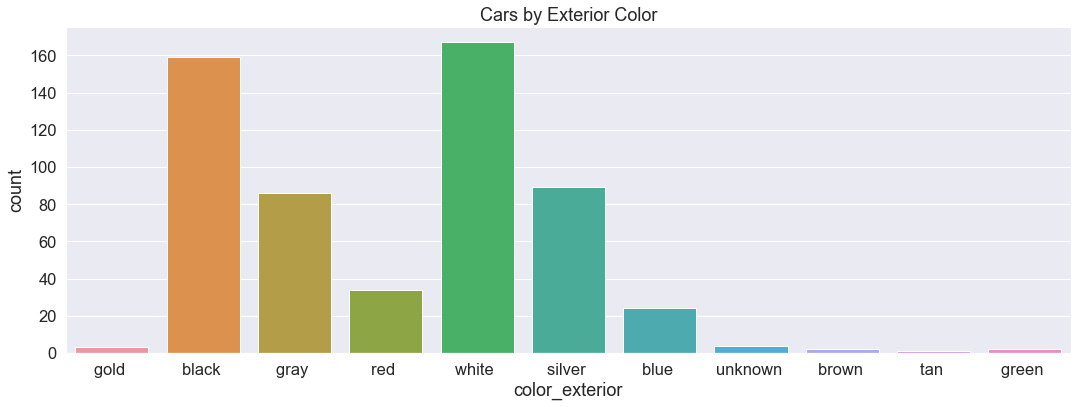

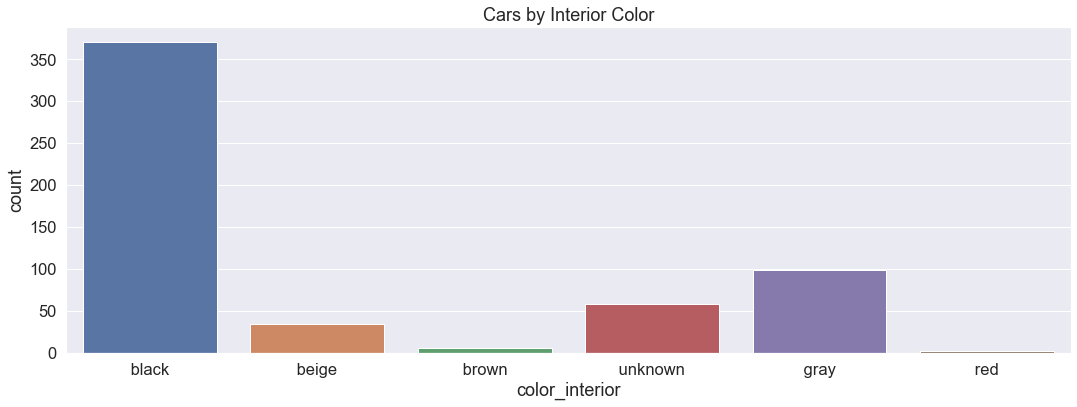

In [16]:
sns.countplot(df[df.color_exterior != "unknown"].color_exterior).set_title("Cars by Exterior Color")
plt.show()
sns.countplot(df[df.color_interior != "unknown"].color_interior).set_title("Cars by Interior Color")
plt.show()

Text(0.5, 1.0, 'Cars by Number of Accidents')

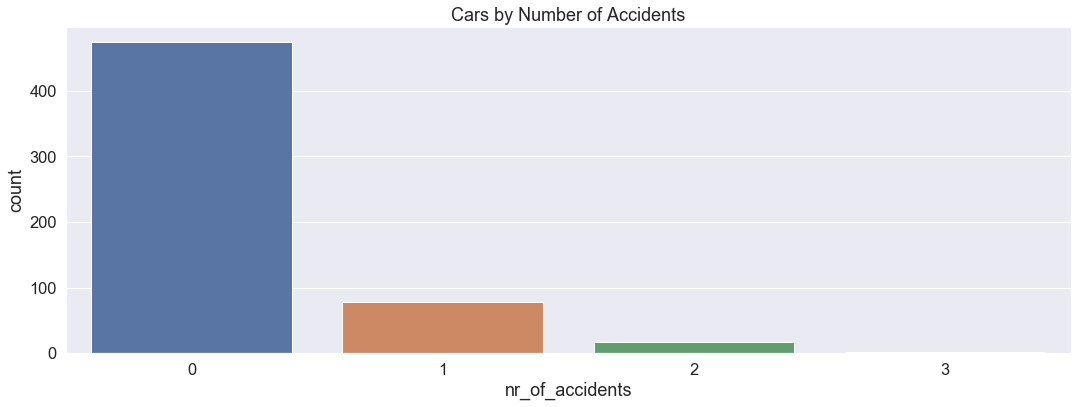

In [17]:
sns.countplot(df[df.nr_of_accidents.notnull()].nr_of_accidents.astype(int)).set_title('Cars by Number of Accidents')

In [18]:
df.corr()

,year,mileage,engine_power_kW,engine_power_hp,consumption_(l/100 km),ecology_(gCO2/km),price,engine_size,nr_of_accidents,price_eur
year,1.000000,-0.588072,-0.239374,-0.239982,-0.581202,-0.508112,0.096891,-0.052044,-0.184696,0.182792
mileage,-0.588072,1.000000,0.496013,0.496112,0.253535,0.350195,-0.057522,0.147511,0.196110,-0.121639
engine_power_kW,-0.239374,0.496013,1.000000,0.999975,0.574927,0.657618,0.156577,NaN,NaN,0.156577
engine_power_hp,-0.239982,0.496112,0.999975,1.000000,0.574901,0.657874,0.155386,NaN,NaN,0.155386
consumption_(l/100 km),-0.581202,0.253535,0.574927,0.574901,1.000000,0.971257,-0.106104,NaN,NaN,-0.106104
ecology_(gCO2/km),-0.508112,0.350195,0.657618,0.657874,0.971257,1.000000,-0.121040,NaN,NaN,-0.121040
price,0.096891,-0.057522,0.156577,0.155386,-0.106104,-0.121040,1.000000,0.160793,-0.184802,0.979466
engine_size,-0.052044,0.147511,NaN,NaN,NaN,NaN,0.160793,1.000000,NaN,0.171127
nr_of_accidents,-0.184696,0.196110,NaN,NaN,NaN,NaN,-0.184802,NaN,1.000000,-0.184802
price_eur,0.182792,-0.121639,0.156577,0.155386,-0.106104,-0.121040,0.979466,0.171127,-0.184802,1.000000


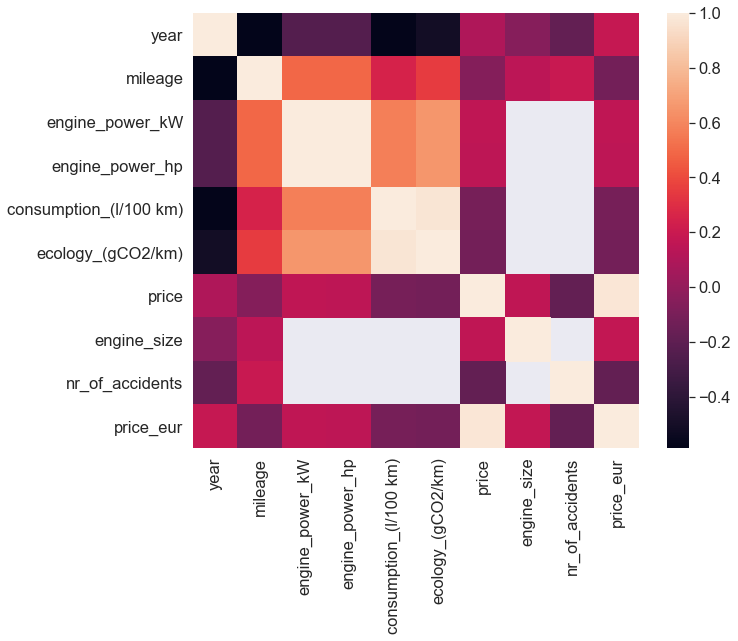

In [19]:
rcParams["figure.figsize"] = 10, 8
sns.heatmap(df.corr())

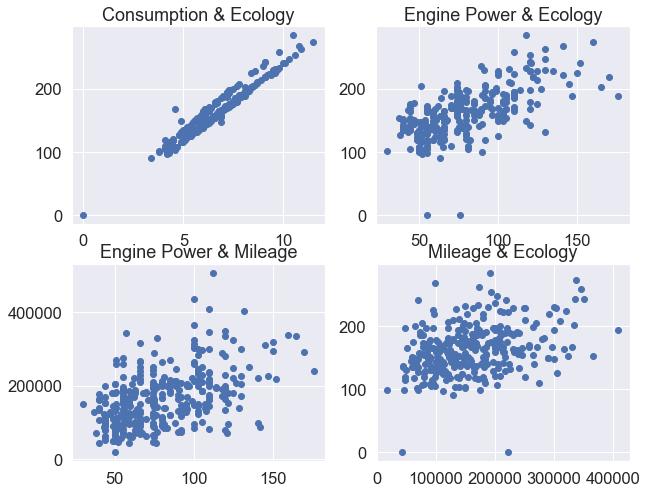

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].scatter(df["consumption_(l/100 km)"], df['ecology_(gCO2/km)'])
ax[0, 0].set_title("Consumption & Ecology")

ax[0, 1].scatter(df["engine_power_kW"], df['ecology_(gCO2/km)'])
ax[0, 1].set_title("Engine Power & Ecology")

ax[1, 0].scatter(df["engine_power_kW"], df['mileage'])
ax[1, 0].set_title("Engine Power & Mileage")

ax[1, 1].scatter(df["mileage"], df['ecology_(gCO2/km)'])
ax[1, 1].set_title("Mileage & Ecology")

plt.show()

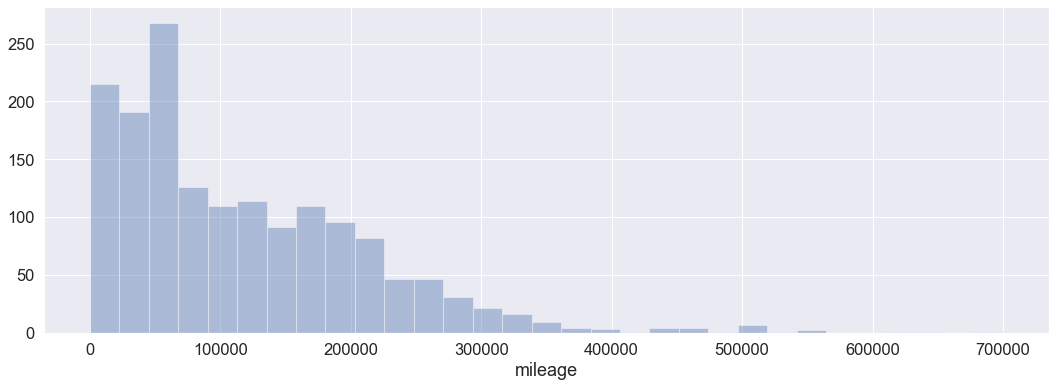

In [22]:
rcParams["figure.figsize"] = 18, 6
sns.distplot(df.mileage, kde=False)
# plt.xticks(rotation = 90)
plt.show()

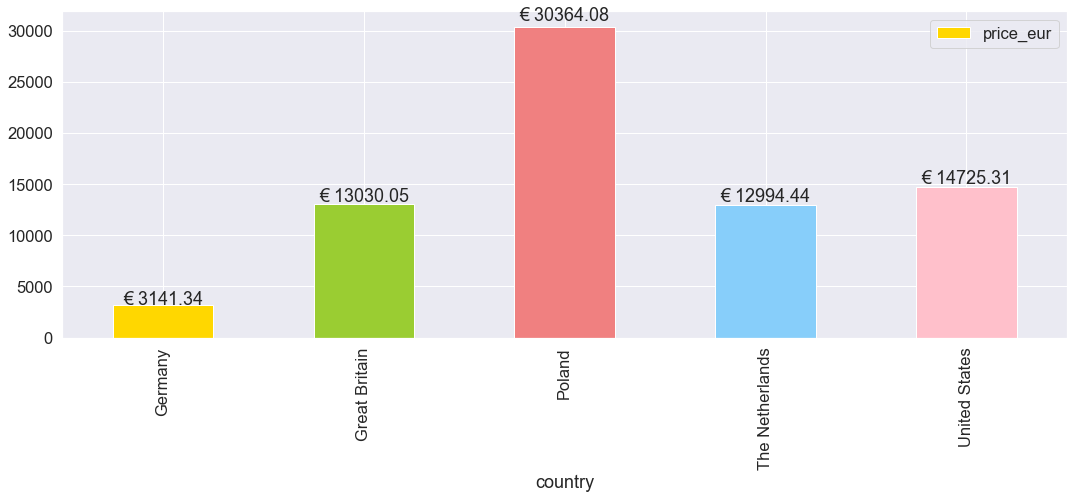

In [23]:
df_country_mean = df.groupby(['country']).mean().round(2)
df_country_mean = df_country_mean['price_eur'].to_frame()
df_bars = df_country_mean.plot(kind="bar", color=[randomize_colors()])
for bar in df_bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy() 
    df_bars.annotate(f'€ {height}', (x + width/2, y + height*1.02), ha='center')

Text(0.5, 1.0, 'Boxplots of Price per Country')

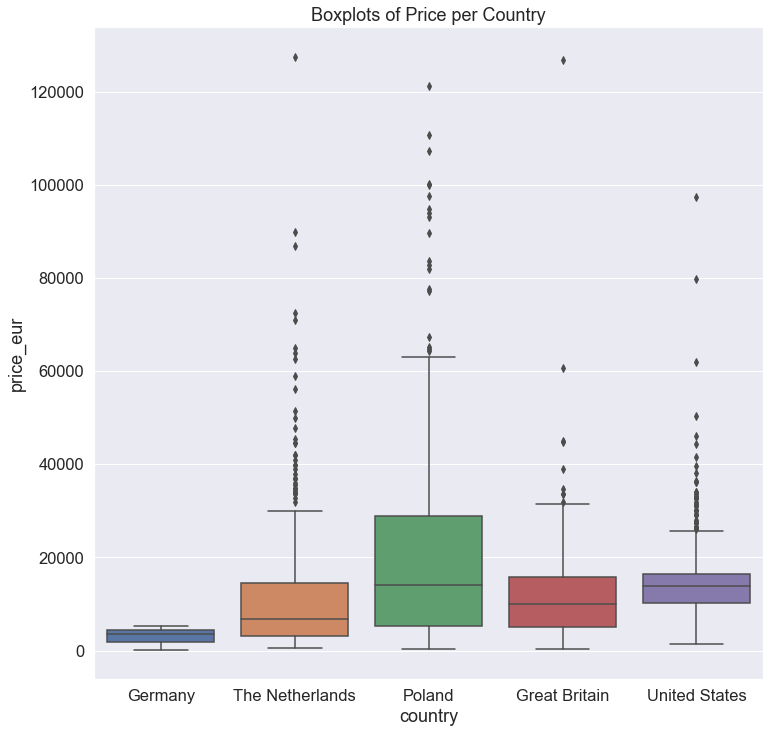

In [24]:
df2 = df[df.price_eur < 200_000]
plt.figure(figsize=(12, 12))
sns.boxplot(y=df2.price_eur, x=df2.country, data=df2).set_title("Boxplots of Price per Country")